# Mask R-CNN Inference
- OpenCV DNN 활용
- 기본적으로 Faster R-CNN이랑 매우 유사
  - Faster R-CNN에서는 RoIpooling 기법을 적용했지만 Mask R-CNN에서는 RoIAlign 기법을 적용함
- 그리고 Masking을 하기위해서 FCN(Fully Convolutional Network)을 추가함

## Mask R-CNN --> Faster R-CNN + FCN


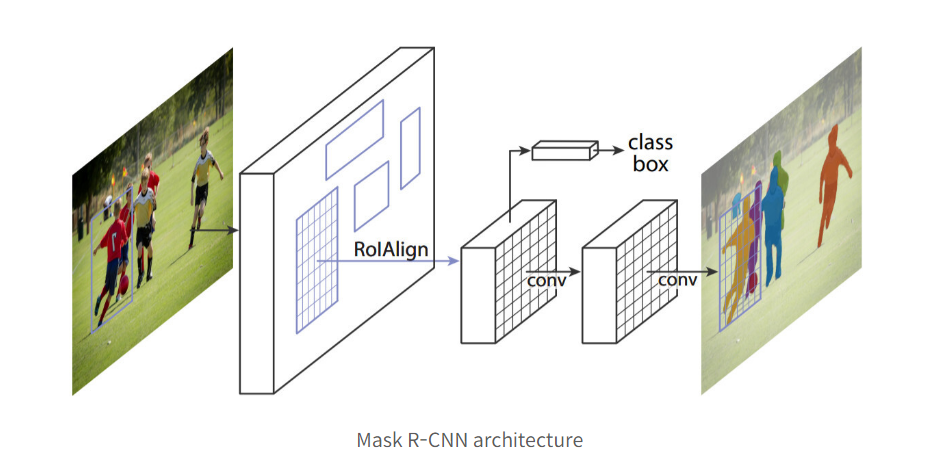

## OpenCV DNN 패키지를 이용해 MASK R-CNN Object Detection/Instance Segmentation 수행
- Tensorflow에서 Pretrained된 모델 파일을 OpenCV에서 로드하여 이미지와 영상에 대한 Object Detection 수행

- https://junstar92.tistory.com/411

In [1]:
!mkdir /content/data
!wget -O ./data/notfallen.jpg https://github.com/hs0224/Capstone-Design/blob/main/DL/images/notfallen.jpg?raw=true

--2023-01-14 05:49:19--  https://github.com/hs0224/Capstone-Design/blob/main/DL/images/notfallen.jpg?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/hs0224/Capstone-Design/raw/main/DL/images/notfallen.jpg [following]
--2023-01-14 05:49:20--  https://github.com/hs0224/Capstone-Design/raw/main/DL/images/notfallen.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hs0224/Capstone-Design/main/DL/images/notfallen.jpg [following]
--2023-01-14 05:49:20--  https://raw.githubusercontent.com/hs0224/Capstone-Design/main/DL/images/notfallen.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133

image shape: (765, 1125, 3)


(-0.5, 1124.5, 764.5, -0.5)

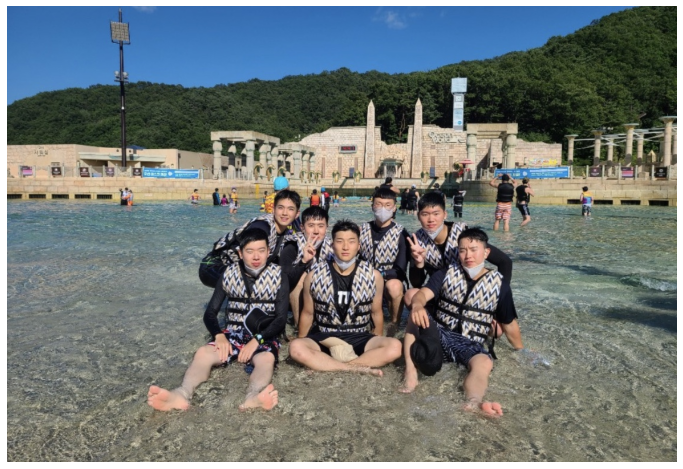

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/test_img.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)
plt.axis('off')

## Tensorflow에서 Pretrained된 Inference모델이랑 환경파일을 다운로드 받은 후 이를 이용해 OpenCV에서 Inference 모델 생성

- https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API 

In [4]:
!mkdir ./pretrained
!wget -O ./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_mask_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt

--2023-01-14 05:49:51--  http://download.tensorflow.org/models/object_detection/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.213.128, 2607:f8b0:400c:c0a::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.213.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177817887 (170M) [application/x-tar]
Saving to: ‘./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’

./pretrained/mask_r 100%[===================>] 169.58M   200MB/s    in 0.8s    

2023-01-14 05:49:52 (200 MB/s) - ‘./pretrained/mask_rcnn_inception_v2_coco_2018_01_28.tar.gz’ saved [177817887/177817887]

--2023-01-14 05:49:52--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.co

In [5]:
!tar -xvf ./pretrained/mask*.tar.gz -C ./pretrained

mask_rcnn_inception_v2_coco_2018_01_28/
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.index
mask_rcnn_inception_v2_coco_2018_01_28/checkpoint
mask_rcnn_inception_v2_coco_2018_01_28/pipeline.config
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.data-00000-of-00001
mask_rcnn_inception_v2_coco_2018_01_28/model.ckpt.meta
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/saved_model.pb
mask_rcnn_inception_v2_coco_2018_01_28/saved_model/variables/
mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb


## DNN에서 readNetFromTensorflow()로 tensorflow inference 모델을 로딩 후 Inference 수행

- `cv_net.forward()` 수행 시 Bounding box Inference(bbox regression, bbox classification)과 mask inference 결과를 함께 출력하기 위해 layer명 detection_out_final, detection_masks 결과 가져옴

In [6]:

# 우리가 사용할 model과 config 파일 설정
cv_net = cv2.dnn.readNetFromTensorflow('/content/pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb',
                                       '/content/pretrained/config_mask_graph.pbtxt')


blob = cv2.dnn.blobFromImage(img, swapRB = True, crop=False)
# net에 입력되는 데이터는 blob 형식으로 변경해줘야함
# blob : opencv에서 Mat타입의 4차원(4D Tensor:NCHW) 행렬
# N:이미지 개수, C: 채널 개수, H:이미지 세로, W:이미지 가로
print(blob.shape)

# Net에 blob 형태의 데이터를 넣어주는 함수
cv_net.setInput(blob)

# Net을 실행 시켜줌(순방향)
boxes, masks = cv_net.forward(['detection_out_final', 'detection_masks'])
# Bounding box 정보는 detection_out_final layer에서 mask정보는 detection_masks layer에서 추출

(1, 3, 765, 1125)


In [7]:
layer_names = cv_net.getLayerNames()
layer_names

('Preprocessor/mul',
 'Preprocessor/sub',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d/depthwise',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/separable_conv2d',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_1a_7x7/Relu',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/MaxPool_2a_3x3/MaxPool',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/Conv2D',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2b_1x1/Relu',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/Conv2D',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/BatchNorm/FusedBatchNorm',
 'FirstStageFeatureExtractor/InceptionV2/InceptionV2/Conv2d_2c_3x3/Relu',
 'FirstStageFeatureExtractor/InceptionV2/I

In [8]:
# coco dataset의 클래스 ID별 클래스명 매핑
labels_to_names_seq= {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}


# masking 시 클래스별 컬러 적용
# 이 중에 랜덤하게 선택해서 시각화할 때 적용
colors = list(
    [[0, 255, 0],
     [0, 0, 255],
     [255, 0, 0],
     [0, 255, 255],
     [255, 255, 0],
     [255, 0, 255],
     [80, 70, 180],
     [250, 80, 190],
     [245, 145, 50],
     [70, 150, 250],
     [50, 190, 190]] )

In [9]:
# bbox 정보는 찾아낸 object 갯수별로(여기서는 100개), class_id, class confidence score, bbox 좌표등 7개의 정보로 구성
# masking 정보는 obecjt 갯수별로 90개의 coco class 별로 15x15 masking으로 구성
print('boxes shape:', boxes.shape, 'masks shape:', masks.shape)

boxes shape: (1, 1, 100, 7) masks shape: (100, 90, 15, 15)


## Detect된 Object에 대해서 bounding box와 mask 시각화
- 이미지를 mask 설명을 위해서 Detected된 모든 object를 시각화 하지 않고 단 하나의 object만 시각화 수행(iteration을 한번만 수행)

In [10]:
boxes.shape, masks.shape

((1, 1, 100, 7), (100, 90, 15, 15))

In [11]:
print(boxes[0,0,1]) # 첫번째는 의미x, 두번째 정보는 클래스 id, 세번째 정보는 score
print(len(boxes[0,0,1]))

[0.         0.         0.9774115  0.6338891  0.48047495 0.77594113
 0.9121009 ]
7


In [12]:
img_rgb.shape

(765, 1125, 3)

In [13]:
import numpy as np

numclasses = masks.shape[1]             # COCO dataset class 90개
numDetections = boxes.shape[2]          # 찾아낸 object 개수 (100개)

# 따로 bouding box를 그리게 될 별도의 image array 생성
draw_img = img_rgb.copy()

img_height = draw_img.shape[0]          # 이미지 세로 633
img_width = draw_img.shape[1]           # 이미지 가로 806

conf_threshold = 0.5
# mask 확률이 0.3 보다 크면 1 0.3보다 작으면 0으로 처리
mask_threshold = 0.3

green_color=(0, 255, 0)                 # 초록색
red_color=(0, 0, 255)                   # 빨간색

# 이미지를 mask 설명을 위해 iteration을 한번만 수행
for i in range(1):
  box = boxes[0, 0, i]                  # 찾아낸 obejct 100개중 1개씩 가져옴 (여기서는 1번째 정보를 가져옴)
  mask = masks[i]                       # mask 정보 또한 찾아낸 object 100개중 1번째 정보를 가져옴
  score = box[2]                        # 해당 클래스로 얼마나 확신한지(box[2]--> 확률값이 들어가있음)
  if score > conf_threshold:            # 해당 클래스로 50% 이상으로 확신한다면 조건 만족
    classId = int(box[1])
    # bounding box를 그리기 위한 좌상단, 우하단 좌표를 구함
    left = int(img_width * box[3])
    top = int(img_height * box[4])
    right = int(img_width * box[5])
    bottom = int(img_height * box[6])

    # 위에서 구한 좌표를 바탕으로 Text와 rectangle를 그림
    text = "{}: {:.4f}".format(labels_to_names_seq[classId], score)
    cv2.rectangle(draw_img, (left, top), (right, bottom), green_color, thickness=2)
    cv2.putText(draw_img, text, (left, top-3), cv2.FONT_HERSHEY_SIMPLEX, 0.3, red_color, 1)

    
    # 네트워크 모델에서 반환된 detect된 obejct의 mask 정보 추출
    # masks = (100, 90, 15, 15) --> 전체 masking 정보
    # mask = (90, 15, 15) --> 위에서 구한 object 100개중 1번째 정보
    # classMask.shape = (15, 15)
    classMask = mask[classId]            # object 100개중 1번째 정보를 가져온다음(masks[1]) 그 정보의 클래스 아이디에 맞는 masking정보 추출
    print('Detect된 classMask shape:', classMask.shape)
    # 개별적인 object size로 늘려줘야함 각각 object마다 크기가 다를탠데 전부 15x15로 masking 한다는게 말이 안댐

    # 위에서 가져온 좌표를 바탕으로 object size만큼 늘려줌
    scaled_classMask = cv2.resize(classMask, (right-left+1, bottom-top+1))
    print('원본 오브젝트 비율로 scale out된 classMask shape:', scaled_classMask.shape)

    # 위에서 설정한 mask Threshold(0.3) 값 이상이면 True(1) 아니면 False(0)형태의 mask 정보 생성
    s_mask_b = (scaled_classMask > mask_threshold)

    print('scaled mask shape:', s_mask_b.shape, 'scaled mask pixel count:', s_mask_b.shape[0]*s_mask_b.shape[1],
      'scaled mask true shape:',s_mask_b[s_mask_b==True].shape, 
      'scaled mask False shape:', s_mask_b[s_mask_b==False].shape)


    # mask를 적용할 bounding box 영역의 iamge 추출
    before_mask_roi = draw_img[top:bottom+1, left:right+1]
    print('before_mask_roi:', before_mask_roi.shape)



Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (318, 247)
scaled mask shape: (318, 247) scaled mask pixel count: 78546 scaled mask true shape: (36056,) scaled mask False shape: (42490,)
before_mask_roi: (318, 247, 3)


In [14]:
# mask 정보
s_mask_b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

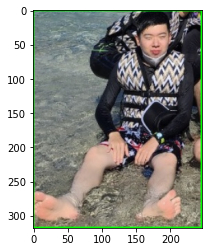

In [15]:
# mask를 적용할 image를 잘라냄 
plt.imshow(before_mask_roi)

## Detected된 obejct에 mask 적용 후 시각화

In [16]:
vis_mask = (s_mask_b * 255).astype("uint8")
# True 에 해당하는건 전부 255로 바뀜 (흰색)
# False 에 해당하는건 그대로 0  (검은색)
print(vis_mask)
print(vis_mask.shape, vis_mask[vis_mask >= 1], vis_mask[vis_mask >= 1].shape)

# OpenCV로 원본 Object에 masking 작업 수행
instance = cv2.bitwise_and(before_mask_roi, before_mask_roi, mask=vis_mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(318, 247) [255 255 255 ... 255 255 255] (36056,)


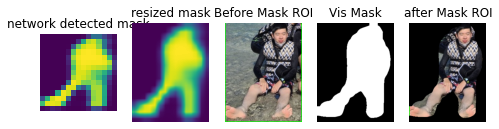

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(figsize=(8, 8), ncols=5, nrows=1)

# 예측한 ClassMask
ax1.set_title('network detected mask')
ax1.axis('off')
ax1.imshow(classMask)

# Object size만큼 다시 resize한 mask
ax2.set_title('resized mask')
ax2.axis('off')
ax2.imshow(scaled_classMask)

# mask를 적용할 bounding box 영역의 iamge
ax3.set_title('Before Mask ROI')
ax3.axis('off')
ax3.imshow(before_mask_roi)

# mask 영역
ax4.set_title('Vis Mask')
ax4.axis('off')
ax4.imshow(vis_mask, cmap='gray')

# mask를 적용한 bounding box 영역의 image
ax5.set_title('after Mask ROI')
ax5.axis('off')
ax5.imshow(instance)

## Detected된 object에 mask를 특정 투명 컬러로 적용후 시각화

In [18]:
s_mask_b

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
draw_img[top:bottom+1, left:right+1].shape, draw_img[top:bottom+1, left:right+1][s_mask_b].shape

((318, 247, 3), (36056, 3))

[0, 255, 255]


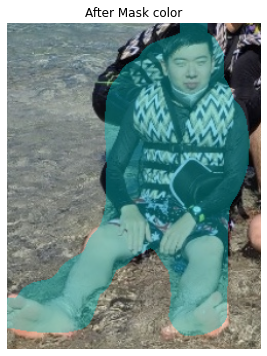

In [20]:
import numpy as np

# 특정 투명 컬러를 적용할 별도의 이미지 생성
draw_img = img_rgb.copy()

# 앞에서 정의한 colors에서 랜덤하게 하나의 색을 뽑음
colorIndex = np.random.randint(0, len(colors)-1)
color = colors[colorIndex]
print(color)

# s_mask_b는 boolean형태로 되어있음
after_mask_roi = draw_img[top:bottom+1, left:right+1][s_mask_b]

# 투명컬러 적용
draw_img[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('After Mask color')
plt.imshow(draw_img[top:bottom+1, left:right+1])

In [21]:
print('object image shape:', draw_img[top:bottom+1, left:right+1].shape)
print('boolena object mask:', s_mask_b, s_mask_b.shape)
print('object masking boolen index 결과 shape:', draw_img[top:bottom+1, left:right+1][s_mask_b].shape)

object image shape: (318, 247, 3)
boolena object mask: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] (318, 247)
object masking boolen index 결과 shape: (36056, 3)


In [22]:
# 투명컬러 적용 방법
print('투명 color 적용 1:', [0.3*color[0], 0.3*color[1], 0.3*color[2]])
print('투명 color 적용 2:', 0.6 * after_mask_roi)

투명 color 적용 1: [0.0, 76.5, 76.5]
투명 color 적용 2: [[22.2 24.  33. ]
 [21.6 23.4 32.4]
 [15.  16.8 25.8]
 ...
 [98.4 87.6 74.4]
 [91.8 82.2 68.4]
 [94.8 85.2 71.4]]


## Detect된 Object에 contour 윤곽선 적용

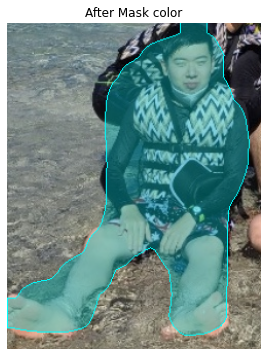

In [23]:
# draw_img_01 = img_rgb.copy()

# boolean형 mask 정보(s_mask_b)를 uint형으로 형변환
s_mask_i = s_mask_b.astype(np.uint8)

# findContours에 넣어 주게되면 mask정보를 해석해서 윤곽선을 찾아줌
# 컨투어(contour)란 동일한 색 또는 동일한 픽셀값(강도,intensity)을 가지고 있는 영역의 경계선 정보
contours, hierarchy = cv2.findContours(s_mask_i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(draw_img[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)


plt.figure(figsize=(6,6))
plt.axis('off')
plt.title('After Mask color')
plt.imshow(draw_img[top:bottom+1, left:right+1])

#### Detected된 Object들에 Mask 하여 시각화 

Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (318, 247)
scaled mask shape: (318, 247) scaled mask pixel count: 78546 scaled mask true shape: (36056,) scaled mask False shape: (42490,)
before_mask_roi: (318, 247, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (331, 160)
scaled mask shape: (331, 160) scaled mask pixel count: 52960 scaled mask true shape: (28126,) scaled mask False shape: (24834,)
before_mask_roi: (331, 160, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (271, 191)
scaled mask shape: (271, 191) scaled mask pixel count: 51761 scaled mask true shape: (32022,) scaled mask False shape: (19739,)
before_mask_roi: (271, 191, 3)
Detect된 classMask shape: (15, 15)
원본 오브젝트 비율로 scale out된 classMask shape: (86, 37)
scaled mask shape: (86, 37) scaled mask pixel count: 3182 scaled mask true shape: (2013,) scaled mask False shape: (1169,)
before_mask_roi: (86, 37, 3)
Detect된 classMask shape: (15, 15)

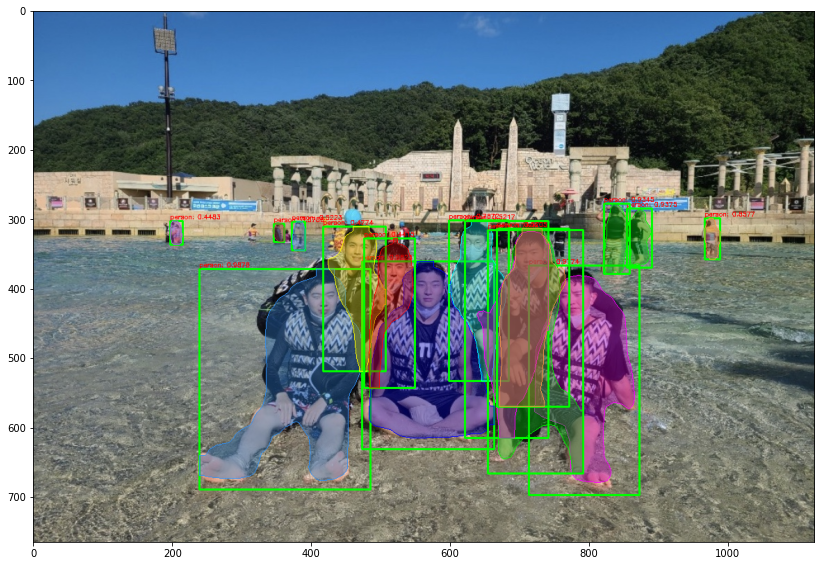

In [24]:
import numpy as np

numClasses = masks.shape[1]
numDetections = boxes.shape[2]

# opencv의 rectangle(), putText() API는 인자로 들어온 IMAGE array에 그대로 수정작업을 수행하므로 bounding box 적용을 위한 
# 별도의 image array 생성. 
draw_img = img.copy()

img_height = draw_img.shape[0]
img_width = draw_img.shape[1]
conf_threshold = 0.4
mask_threshold = 0.3

green_color=(0, 255, 0)
red_color=(0, 0, 255)

for i in range(numDetections):
    box = boxes[0, 0, i]
    mask = masks[i]
    score = box[2]
    if score > conf_threshold:
        classId = int(box[1])
        left = int(img_width * box[3])
        top = int(img_height * box[4])
        right = int(img_width * box[5])
        bottom = int(img_height * box[6])

        text = "{}: {:.4f}".format(labels_to_names_seq[classId], score)
        cv2.rectangle(draw_img, (left, top), (right, bottom), green_color, thickness=2 )
        cv2.putText(draw_img, text, (left, top-3), cv2.FONT_HERSHEY_SIMPLEX, 0.3, red_color, 1)

        #### Detect된 Object에 대한 image mask 처리 수행을 위한 기본 정보 추출. 
        # 네트웍 모델에서 반환된 detect된 object의 mask 정보 추출
        classMask = mask[classId]
        print('Detect된 classMask shape:', classMask.shape)
        # 원본 이미지의 object 크기에 맞춰 mask 크기 scale out 
        scaled_classMask = cv2.resize(classMask, (right - left + 1, bottom - top + 1))
        print('원본 오브젝트 비율로 scale out된 classMask shape:', scaled_classMask.shape)

        # 지정된 mask Threshold 값 이상인지 True, False boolean형태의 mask 정보 생성. 
        s_mask_b = (scaled_classMask > mask_threshold)
        print('scaled mask shape:', s_mask_b.shape, 'scaled mask pixel count:', s_mask_b.shape[0]*s_mask_b.shape[1],
              'scaled mask true shape:',s_mask_b[s_mask_b==True].shape, 
              'scaled mask False shape:', s_mask_b[s_mask_b==False].shape)

        # mask를 적용할 bounding box 영역의 image 추출
        before_mask_roi = draw_img[top:bottom+1, left:right+1]
        print('before_mask_roi:', before_mask_roi.shape)

        # Detect된 Object에 mask를 특정 투명 컬러로 적용. 
        colorIndex = np.random.randint(0, len(colors)-1)
        color = colors[colorIndex]
        after_mask_roi = draw_img[top:bottom+1, left:right+1][s_mask_b]
        draw_img[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8)
        
        # Detect된 Object에 윤곽선(contour) 적용. 
        s_mask_i = s_mask_b.astype(np.uint8)
        contours, hierarchy = cv2.findContours(s_mask_i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(draw_img[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)

plt.figure(figsize=(14, 14))
draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.imshow(draw_img)
plt.show()

#### 영상에 Segmentation 적용

In [25]:
!wget -O ./data/John_Wick_small.mp4 https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4

--2023-01-14 05:51:10--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1794863 (1.7M) [application/octet-stream]
Saving to: ‘./data/John_Wick_small.mp4’

./data/John_Wick_sm 100%[===================>]   1.71M  --.-KB/s    in 0.06s   

2023-01-14 05:51:11 (29.9 MB/s) - ‘./data/John_Wick_small.mp4’ saved [1794863/1794863]



In [26]:
import cv2

def get_box_info(box, img_width, img_height):
    
    classId = int(box[1])
    left = int(img_width * box[3])
    top = int(img_height * box[4])
    right = int(img_width * box[5])
    bottom = int(img_height * box[6])
    
    left = max(0, min(left, img_width - 1))
    top = max(0, min(top, img_height - 1))
    right = max(0, min(right, img_width - 1))
    bottom = max(0, min(bottom, img_height - 1))
    
    return classId, left, top, right, bottom

    
def draw_box(img_array, box, img_width, img_height, is_print=False):
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    
    score = box[2]
    classId, left, top, right, bottom = get_box_info(box, img_width, img_height)
    text = "{}: {:.4f}".format(labels_to_names_seq[classId], score)
    
    if is_print:
        print("box:", box, "score:", score, "classId:", classId)
    
    cv2.rectangle(img_array, (left, top), (right, bottom), green_color, thickness=2 )
    cv2.putText(img_array, text, (left, top-3), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, thickness=1)
    
    return img_array
    
def draw_mask(img_array, box, mask, img_width, img_height, mask_threshold, is_print=False):
        
        classId, left, top, right, bottom = get_box_info(box, img_width, img_height)
        classMask = mask[classId]
        # 원본 이미지의 object 크기에 맞춰 mask 크기 scale out 
        scaled_classMask = cv2.resize(classMask, (right - left + 1, bottom - top + 1))
        s_mask_b = (scaled_classMask > mask_threshold)
        before_mask_roi = img_array[top:bottom+1, left:right+1]
        
        # mask를 적용할 bounding box 영역의 image 추출하고 투명 color 적용. 
        colorIndex = np.random.randint(0, len(colors)-1)
        color = colors[colorIndex]
        after_mask_roi = img_array[top:bottom+1, left:right+1][s_mask_b]
        img_array[top:bottom+1, left:right+1][s_mask_b] = ([0.3*color[0], 0.3*color[1], 0.3*color[2]] + 0.6 * after_mask_roi).astype(np.uint8)
        # Detect된 Object에 윤곽선(contour) 적용. 
        s_mask_i = s_mask_b.astype(np.uint8)
        contours, hierarchy = cv2.findContours(s_mask_i,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img_array[top:bottom+1, left:right+1], contours, -1, color, 1, cv2.LINE_8, hierarchy, 100)
        
        return img_array

In [27]:
import time

def detect_image_mask_rcnn(cv_net, img_array, conf_threshold, mask_threshold, use_copied_array, is_print=False):
    
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
        #draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
    else:
        draw_img = img_array
        
    start_time = time.time()
    
    blob = cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False)
    cv_net.setInput(blob)
    boxes, masks = cv_net.forward(['detection_out_final', 'detection_masks'])
    
    inference_time = time.time() - start_time
    if is_print:
        print('Segmentation Inference time {0:}'.format(inference_time))

    numClasses = masks.shape[1]
    numDetections = boxes.shape[2]

    img_height = img_array.shape[0]
    img_width = img_array.shape[1]
    
    for i in range(numDetections):
        box = boxes[0, 0, i]
        mask = masks[i]
        score = box[2]
        #print("score:", score)
        if score > conf_threshold:
            draw_box(img_array , box, img_width, img_height, is_print=is_print)
            draw_mask(img_array, box, mask, img_width, img_height, mask_threshold, is_print=is_print)
    
    return img_array

In [28]:
def detect_video_mask_rcnn(cv_net, input_path, output_path, conf_threshold, mask_threshold,  is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, 24, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    frame_index=0
    while True:
        hasFrame, img_frame = cap.read()
        frame_index += 1
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        print("frame index:{0:}".format(frame_index), end=" ")
        returned_frame = detect_image_mask_rcnn(cv_net, img_frame, conf_threshold=conf_threshold,
                                                mask_threshold=mask_threshold,use_copied_array=False, is_print=is_print)
        vid_writer.write(returned_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [29]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/mask_rcnn_inception_v2_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_mask_graph.pbtxt')

detect_video_mask_rcnn(cv_net,'/content/data/John_Wick_small.mp4', '/content/data/John_Wick_mask_01.avi',
                      conf_threshold=0.5, mask_threshold=0.3, is_print=True)

총 Frame 갯수: 58
frame index:1 Segmentation Inference time 5.9957005977630615
box: [0.         2.         0.9897792  0.86242795 0.3607605  0.99989486
 0.8309683 ] score: 0.9897792 classId: 2
box: [0.         2.         0.97011715 0.         0.29770774 0.16895679
 0.7383984 ] score: 0.97011715 classId: 2
box: [0.         2.         0.95617515 0.12571141 0.3801415  0.4003645
 0.75959766] score: 0.95617515 classId: 2
box: [0.         2.         0.95180786 0.75568426 0.5090503  0.85527325
 0.7149634 ] score: 0.95180786 classId: 2
box: [0.         2.         0.76113313 0.7179851  0.53895617 0.78393286
 0.6857109 ] score: 0.76113313 classId: 2
box: [0.         0.         0.55496705 0.4124265  0.01324433 0.6135617
 0.69252044] score: 0.55496705 classId: 0
box: [0.         0.         0.5201008  0.65576553 0.41798288 0.72486687
 0.63431793] score: 0.5201008 classId: 0
frame index:2 Segmentation Inference time 4.9151036739349365
box: [0.         2.         0.9903397  0.8629229  0.3609804  0.999895